In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd

#### deaths

In [2]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', sep=',')
print(deaths.shape)
deaths.head()

(280, 673)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7292,7292,7292,7293,7294,7295,7297,7297,7361,7363
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2978,2983,2986,2990,2997,3004,3014,3022,3029,3035
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5966,5971,5977,5984,5991,5997,6005,6009,6015,6017
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1725,1726,1727,1727,1727,1729,1729,1729,1729,1730


In [3]:
deaths = pd.melt(deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                  var_name="Date", value_name="Deaths")
deaths.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [4]:
deaths = deaths[['Country/Region', 'Date', 'Deaths']].groupby(['Country/Region', 'Date']).max().reset_index()
deaths.head()

,Country/Region,Date,Deaths
0,Afghanistan,1/1/21,2201
1,Afghanistan,1/10/21,2277
2,Afghanistan,1/11/21,2288
3,Afghanistan,1/12/21,2301
4,Afghanistan,1/13/21,2308


In [5]:
def to_short_date(df):
    df['year'] = '20' + df.Date.str.split('/').str[2]

    df['day'] = df.Date.str.split('/').str[1]
    df['day'][df['day'].astype(int)<10] = '0' + df['day'][df['day'].astype(int)<10]

    df['month'] = df.Date.str.split('/').str[0]
    df['month'][df['month'].astype(int)<10] = '0' + df['month'][df['month'].astype(int)<10]
    
    df['Date'] = pd.to_datetime(df['year'] + '-' + df['month'] + '-' + df['day'])
    
    df.drop(columns=['day', 'year', 'month'], inplace=True)
    df.rename(columns={'Country/Region':'Country'}, inplace=True)
    return df


In [6]:
deaths = to_short_date(deaths)
deaths.head()

C:\Users\4880~1\AppData\Local\Temp/ipykernel_6636/2708416184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][df['day'].astype(int)<10] = '0' + df['day'][df['day'].astype(int)<10]
C:\Users\4880~1\AppData\Local\Temp/ipykernel_6636/2708416184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][df['month'].astype(int)<10] = '0' + df['month'][df['month'].astype(int)<10]


,Country,Date,Deaths
0,Afghanistan,2021-01-01,2201
1,Afghanistan,2021-01-10,2277
2,Afghanistan,2021-01-11,2288
3,Afghanistan,2021-01-12,2301
4,Afghanistan,2021-01-13,2308


#### confirmed

In [7]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', sep=',')
print(confirmed.shape)
confirmed.head()

(280, 673)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011


In [8]:
confirmed = pd.melt(confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                  var_name="Date", value_name="Confirmed")
confirmed.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [9]:
confirmed = confirmed[['Country/Region', 'Date', 'Confirmed']].groupby(['Country/Region', 'Date']).max().reset_index()
confirmed.head()

,Country/Region,Date,Confirmed
0,Afghanistan,1/1/21,52513
1,Afghanistan,1/10/21,53489
2,Afghanistan,1/11/21,53538
3,Afghanistan,1/12/21,53584
4,Afghanistan,1/13/21,53690


In [10]:
confirmed = to_short_date(confirmed)
confirmed.head()

C:\Users\4880~1\AppData\Local\Temp/ipykernel_6636/2708416184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][df['day'].astype(int)<10] = '0' + df['day'][df['day'].astype(int)<10]
C:\Users\4880~1\AppData\Local\Temp/ipykernel_6636/2708416184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][df['month'].astype(int)<10] = '0' + df['month'][df['month'].astype(int)<10]


,Country,Date,Confirmed
0,Afghanistan,2021-01-01,52513
1,Afghanistan,2021-01-10,53489
2,Afghanistan,2021-01-11,53538
3,Afghanistan,2021-01-12,53584
4,Afghanistan,2021-01-13,53690


#### recovered

In [11]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv', sep=',')
print(recovered.shape)
recovered.head()

(265, 673)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
recovered = pd.melt(recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                  var_name="Date", value_name="Recovered")
recovered.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [13]:
recovered = recovered[['Country/Region', 'Date', 'Recovered']].groupby(['Country/Region', 'Date']).max().reset_index()
recovered.head()

,Country/Region,Date,Recovered
0,Afghanistan,1/1/21,41727
1,Afghanistan,1/10/21,43948
2,Afghanistan,1/11/21,44137
3,Afghanistan,1/12/21,44608
4,Afghanistan,1/13/21,44850


In [14]:
recovered = to_short_date(recovered)
recovered.head()

C:\Users\4880~1\AppData\Local\Temp/ipykernel_6636/2708416184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][df['day'].astype(int)<10] = '0' + df['day'][df['day'].astype(int)<10]
C:\Users\4880~1\AppData\Local\Temp/ipykernel_6636/2708416184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][df['month'].astype(int)<10] = '0' + df['month'][df['month'].astype(int)<10]


,Country,Date,Recovered
0,Afghanistan,2021-01-01,41727
1,Afghanistan,2021-01-10,43948
2,Afghanistan,2021-01-11,44137
3,Afghanistan,2021-01-12,44608
4,Afghanistan,2021-01-13,44850


#### vaccinated

In [15]:
vaccinated = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv', sep=',')
print(vaccinated.shape)
vaccinated.head()

(111923, 8)


,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


In [16]:
vaccinated.isna().sum()

Country_Region                     0
Date                               0
Doses_admin                      441
People_partially_vaccinated    66250
People_fully_vaccinated        66250
Report_Date_String                 0
UID                              392
Province_State                 46346
dtype: int64

In [17]:
vaccinated = vaccinated[['Country_Region', 'Date', 'Doses_admin', 'People_partially_vaccinated',
       'People_fully_vaccinated']].fillna(0).groupby(['Country_Region', 'Date']).max().reset_index()
vaccinated.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
0,Afghanistan,2021-02-22,0.0,0.0,0.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0


In [18]:
vaccinated.rename(columns={'Country_Region':'Country'}, inplace=True)
vaccinated.head()

,Country,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
0,Afghanistan,2021-02-22,0.0,0.0,0.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0


In [19]:
vaccinated.Date = pd.to_datetime(vaccinated.Date)
vaccinated.head()

,Country,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
0,Afghanistan,2021-02-22,0.0,0.0,0.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0


In [20]:
vaccinated.shape, confirmed.shape, deaths.shape, recovered.shape

((46535, 5), (131124, 3), (131124, 3), (131124, 3))

In [21]:
vaccinated.Date.min(), confirmed.Date.min()

(Timestamp('2020-12-14 00:00:00'), Timestamp('2020-01-22 00:00:00'))

In [22]:
join = vaccinated.merge(confirmed, how='outer', on=['Country', 'Date']). \
merge(deaths, how='outer', on=['Country', 'Date']). \
merge(recovered, how='outer', on=['Country', 'Date'])

join.head()

,Country,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered
0,Afghanistan,2021-02-22,0.0,0.0,0.0,55617.0,2433.0,48895.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0,55646.0,2435.0,48967.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0,55664.0,2436.0,49086.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0,55680.0,2438.0,49281.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0,55696.0,2442.0,49285.0


In [23]:
join.describe()

,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered
count,4.653500e+04,4.653500e+04,4.653500e+04,1.311240e+05,131124.000000,1.311240e+05
mean,4.233500e+07,2.317959e+07,1.534838e+07,4.824647e+05,10808.924743,1.789000e+05
std,3.453356e+08,1.881720e+08,1.353838e+08,2.482203e+06,47796.675362,1.079304e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.672390e+05,1.000000e+05,1.532850e+04,7.080000e+02,9.000000,0.000000e+00
50%,1.228216e+06,7.624970e+05,3.372770e+05,1.371400e+04,216.000000,1.516000e+03
75%,7.459438e+06,4.264143e+06,2.532854e+06,1.624235e+05,2977.000000,3.849700e+04
max,7.613345e+09,4.082455e+09,3.210708e+09,4.770187e+07,771013.000000,3.097475e+07


In [24]:
join.isna().sum()

Country                            0
Date                               0
Doses_admin                    85125
People_partially_vaccinated    85125
People_fully_vaccinated        85125
Confirmed                        536
Deaths                           536
Recovered                        536
dtype: int64

In [25]:
import warnings
warnings.filterwarnings("ignore")
import world_bank_data as wb
def actualize(df):
    df.reset_index(inplace=True)
    title = df['Series'].iloc[0]
    df.dropna(inplace=True)
    df['Actual_year'] = df.groupby('Country').Year.transform('max')
    df = df[df.Actual_year==df.Year]
    df.drop(columns=['Series','Year', 'Actual_year'], axis=1, inplace=True)
    df.columns = ['Country', title]
    return df

def actualize_2(df):
    df.reset_index(inplace=True)

    df.dropna(inplace=True)
    df['Actual_year'] = df.groupby('Country').Year.transform('max')
    df = df[df.Actual_year==df.Year]
    df.drop(columns=['Year'], axis=1, inplace=True)
    return df



df = actualize(pd.DataFrame(wb.get_series('SP.POP.TOTL')))
df2 = actualize_2(pd.DataFrame(wb.get_series('SP.POP.TOTL', id_or_value='id')))

population = df.merge(df2[['Country', 'Actual_year']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})


population.Country[population.Country.str.contains('Iran', case=False)] ='Iran'
population.Country[population.Country.str.contains('Korea, Rep.', case=False)] = 'Korea, South'
population.Country[population.Country.str.contains('Kyrgyz', case=False)] = 'Kyrgyzstan'
population.Country[population.Country.str.contains('Lao', case=False)] = 'Laos'
population.Country[population.Country.str.contains('Czech', case=False)] = 'Czechia'
population.Country[population.Country.str.contains('Micronesia', case=False)] = 'Micronesia'
population.Country[population.Country.str.contains('Russia', case=False)] = 'Russia'
population.Country[population.Country.str.contains('Kitts', case=False)] = 'Saint Kitts and Nevis'
population.Country[population.Country.str.contains('Myanmar', case=False)] = 'Burma'
population.Country[population.Country.str.contains('Vincent', case=False)] = 'Saint Vincent and the Grenadines'
population.Country[population.Country.str.contains('Slovak', case=False)] = 'Slovakia'
population.Country[population.Country.str.contains('Syr', case=False)] = 'Syria'
population.Country[population.Country.str.contains('United States', case=False)] = 'US'
population.Country[population.Country.str.contains('Venezuela', case=False)] = 'Venezuela'
population.Country[population.Country.str.contains('Bahamas', case=False)] = 'Bahamas'
population.Country[population.Country.str.contains('Brunei', case=False)] = 'Brunei'
population.Country[population.Country.str.contains('Egypt', case=False)] = 'Egypt'
population.Country[population.Country.str.contains('Gambia', case=False)] = 'Gambia'
population.Country[population.Country.str.contains('Lucia', case=False)] = 'Saint Lucia'
print(sorted(set(join.Country) - set(population.Country)))
#population.Country[population.Country.str.contains('United States', case=False)] = 'US (Aggregate)'


join = join.merge(population, how='inner', on='Country')


join.drop(columns=['Doses_admin', 'ISO'], inplace=True)

['Congo (Brazzaville)', 'Congo (Kinshasa)', 'Diamond Princess', 'Holy See', 'MS Zaandam', 'Summer Olympics 2020', 'Taiwan*', 'US (Aggregate)', 'Yemen']


In [26]:
join.head()

,Country,Date,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,"Population, total",Actual_year
0,Afghanistan,2021-02-22,0.0,0.0,55617.0,2433.0,48895.0,38928341.0,2020
1,Afghanistan,2021-02-23,0.0,0.0,55646.0,2435.0,48967.0,38928341.0,2020
2,Afghanistan,2021-02-24,0.0,0.0,55664.0,2436.0,49086.0,38928341.0,2020
3,Afghanistan,2021-02-25,0.0,0.0,55680.0,2438.0,49281.0,38928341.0,2020
4,Afghanistan,2021-02-26,0.0,0.0,55696.0,2442.0,49285.0,38928341.0,2020


In [27]:
join = join[join.Country != 'World']

In [28]:
join.sort_values(['Country', 'Date'], inplace=True)
join.reset_index(drop=True, inplace=True)
join.head()

,Country,Date,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,"Population, total",Actual_year
0,Afghanistan,2020-01-22,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
1,Afghanistan,2020-01-23,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
2,Afghanistan,2020-01-24,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
3,Afghanistan,2020-01-25,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
4,Afghanistan,2020-01-26,NaN,NaN,0.0,0.0,0.0,38928341.0,2020


In [29]:
join.columns = ['Country', 'Date', 'People_partially_vaccinated',
       'People_fully_vaccinated', 'Confirmed', 'Deaths', 'Recovered',
       'Population', 'Date_of_population']

In [30]:
join.describe()

,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population
count,4.568300e+04,4.568300e+04,1.257720e+05,125772.000000,1.257720e+05,1.257720e+05
mean,1.134785e+07,7.451790e+06,5.027908e+05,11260.398236,1.864235e+05,4.020735e+07
std,6.522092e+07,5.051200e+07,2.532468e+06,48751.785099,1.101399e+06,1.478661e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.809200e+04
25%,9.990000e+04,1.517000e+04,8.790000e+02,11.000000,0.000000e+00,2.054534e+06
50%,7.311330e+05,3.205420e+05,1.591500e+04,247.500000,1.863000e+03,8.932116e+06
75%,4.024704e+06,2.361819e+06,1.801448e+05,3276.000000,4.471500e+04,2.861116e+07
max,1.225000e+09,1.076308e+09,4.770187e+07,771013.000000,3.097475e+07,1.402112e+09


In [31]:
join_copy = join.copy()
# join_copy.to_pickle('vaccination_data.pkl')
# join = pd.read_pickle('vaccination_data.pkl')
join = join_copy.copy()
join.head()

,Country,Date,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population,Date_of_population
0,Afghanistan,2020-01-22,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
1,Afghanistan,2020-01-23,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
2,Afghanistan,2020-01-24,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
3,Afghanistan,2020-01-25,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
4,Afghanistan,2020-01-26,NaN,NaN,0.0,0.0,0.0,38928341.0,2020


In [32]:
join['Max_death_window'] = pd.DataFrame(join.groupby('Country').Deaths.expanding().max()).reset_index().drop(columns='level_1').Deaths
join['Mean_death_window'] = join.groupby('Country', as_index=False).Deaths.rolling(14).mean().Deaths

join['Max_partially_vaccinated_window'] = pd.DataFrame(join.groupby('Country').People_partially_vaccinated.expanding().max()).reset_index().drop(columns='level_1').People_partially_vaccinated
join['Mean_partially_vaccinated_window'] = join.groupby('Country', as_index=False).People_partially_vaccinated.rolling(14).mean().People_partially_vaccinated

join['Max_fully_vaccinated_window'] = pd.DataFrame(join.groupby('Country').People_fully_vaccinated.expanding().max()).reset_index().drop(columns='level_1').People_fully_vaccinated
join['Mean_fully_vaccinated_window'] = join.groupby('Country', as_index=False).People_fully_vaccinated.rolling(14).mean().People_fully_vaccinated



join.Deaths[join.Deaths<join.Max_death_window] = join.Max_death_window[join.Deaths<join.Max_death_window]

join.People_partially_vaccinated[join.People_partially_vaccinated<join.Max_partially_vaccinated_window] = \
join.Max_partially_vaccinated_window[join.People_partially_vaccinated<join.Max_partially_vaccinated_window]

join.People_fully_vaccinated[join.People_fully_vaccinated<join.Max_fully_vaccinated_window] = \
join.Max_fully_vaccinated_window[join.People_fully_vaccinated<join.Max_fully_vaccinated_window]

In [33]:
join['Deaths_1_day'] = (join['Deaths'] - join.groupby(['Country'])['Deaths'].shift(1))
join['Confirmed_1_day'] = (join['Confirmed'] - join.groupby(['Country'])['Confirmed'].shift(1))
join['Recovered_1_day'] = (join['Recovered'] - join.groupby(['Country'])['Recovered'].shift(1))

join['People_partially_vaccinated_1_day'] = (join['People_partially_vaccinated'] - join.groupby(['Country']) \
                                             ['People_partially_vaccinated'].shift(1))

join['People_fully_vaccinated_1_day'] = (join['People_fully_vaccinated'] - join.groupby(['Country']) \
                                             ['People_fully_vaccinated'].shift(1))

join[['Deaths_1_day', 'People_partially_vaccinated_1_day', 'People_fully_vaccinated_1_day']].describe()

,Deaths_1_day,People_partially_vaccinated_1_day,People_fully_vaccinated_1_day
count,125584.00000,4.537000e+04,4.537000e+04
mean,40.76235,9.023576e+04,7.036520e+04
std,192.39297,3.753625e+06,2.897454e+06
min,0.00000,0.000000e+00,0.000000e+00
25%,0.00000,0.000000e+00,0.000000e+00
50%,0.00000,0.000000e+00,0.000000e+00
75%,10.00000,1.207675e+04,8.032750e+03
max,8786.00000,6.220000e+08,5.537470e+08


In [34]:
print(join.shape)
join = join[(join.Deaths>0)&(join.People_partially_vaccinated>0)]
print(join.shape)

(125772, 20)
(42529, 20)


In [35]:
join['Country_mean_partially_vaccinated_1_day'] = join.groupby('Country').People_partially_vaccinated_1_day.transform('mean')
join['Country_mean_deaths_1_day'] = join.groupby('Country').Deaths_1_day.transform('mean')
join['Country_count'] = join.groupby('Country').Deaths_1_day.transform('count')

In [36]:
print(join.shape)
join = join[(join.Country_mean_partially_vaccinated_1_day>0)&(join.Country_mean_deaths_1_day>0)&(join.Country_count>10)]
print(join.shape)

(42529, 23)
(42041, 23)


In [37]:
join.describe()

,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population,Max_death_window,Mean_death_window,Max_partially_vaccinated_window,Mean_partially_vaccinated_window,Max_fully_vaccinated_window,Mean_fully_vaccinated_window,Deaths_1_day,Confirmed_1_day,Recovered_1_day,People_partially_vaccinated_1_day,People_fully_vaccinated_1_day,Country_mean_partially_vaccinated_1_day,Country_mean_deaths_1_day,Country_count
count,4.204100e+04,4.204100e+04,4.204100e+04,42041.000000,4.204100e+04,4.204100e+04,42041.000000,42041.000000,4.204100e+04,3.912900e+04,4.204100e+04,3.912900e+04,42041.000000,42041.000000,4.204100e+04,4.185600e+04,4.185600e+04,4.204100e+04,42041.000000,42041.000000
mean,8.964528e+06,5.420460e+06,1.281018e+06,27256.390785,4.087124e+05,4.013706e+07,27256.390785,26772.553393,8.964528e+06,9.036036e+06,5.420460e+06,5.424919e+06,74.046883,3942.314146,-1.258134e+03,6.852035e+04,5.054077e+04,6.839204e+04,74.046883,275.387669
std,3.854280e+07,1.977546e+07,4.182349e+06,78916.705574,1.781617e+06,1.270533e+08,78916.705574,77766.226314,3.854280e+07,3.841382e+07,1.977546e+07,1.948252e+07,283.224420,16427.433294,1.881986e+05,3.745015e+05,2.439957e+05,2.294238e+05,200.553216,47.405635
min,1.000000e+00,0.000000e+00,6.800000e+01,1.000000,0.000000e+00,3.393800e+04,1.000000,0.071429,1.000000e+00,2.857143e-01,0.000000e+00,0.000000e+00,0.000000,-349116.000000,-3.097475e+07,0.000000e+00,0.000000e+00,7.738462e+01,0.008439,24.000000
25%,1.789130e+05,3.089300e+04,4.163100e+04,589.000000,0.000000e+00,2.794700e+06,589.000000,564.428571,1.789130e+05,1.870056e+05,3.089300e+04,3.788421e+04,0.000000,38.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.452663e+03,2.136986,248.000000
50%,9.078390e+05,4.260820e+05,2.308210e+05,3445.000000,6.476000e+03,9.890400e+06,3445.000000,3329.000000,9.078390e+05,9.116439e+05,4.260820e+05,4.409119e+05,5.000000,410.000000,0.000000e+00,4.400000e+01,0.000000e+00,1.379522e+04,11.356863,276.000000
75%,4.483598e+06,2.751436e+06,7.576760e+05,14816.000000,1.997790e+05,3.297185e+07,14816.000000,14633.500000,4.483598e+06,4.524374e+06,2.751436e+06,2.772350e+06,32.000000,1939.000000,4.130000e+02,1.519125e+04,1.033025e+04,4.741942e+04,46.658784,318.000000
max,7.621693e+08,3.914263e+08,4.770187e+07,771013.000000,3.097475e+07,1.380004e+09,771013.000000,763303.285714,7.621693e+08,7.515282e+08,3.914263e+08,3.667494e+08,8786.000000,414188.000000,4.224360e+05,1.670510e+07,8.135270e+06,2.466567e+06,1339.383929,341.000000


In [38]:
join['People_partially_vaccinated_1_day_of_share'] = join['People_partially_vaccinated_1_day'] * 1000000 / join['Population'] 
join['People_partially_vaccinated_1_day_of_share'].describe()

count     41856.000000
mean       1797.070664
std        7658.151588
min           0.000000
25%           0.000000
50%          12.824899
75%        1565.207818
max      668765.615161
Name: People_partially_vaccinated_1_day_of_share, dtype: float64

In [39]:
join['Vaccinated_partially_share'] = join.People_partially_vaccinated / join['Population'] * 100
join['Vaccinated_fully_share'] = join.People_fully_vaccinated / join['Population'] * 100

In [40]:
join['Vaccinated_partially_scaled'] = (join.People_partially_vaccinated - join.groupby('Country').People_partially_vaccinated.transform('mean')) / \
join.groupby('Country').People_partially_vaccinated.transform('std')

join['Vaccinated_fully_scaled'] = (join.People_fully_vaccinated - join.groupby('Country').People_fully_vaccinated.transform('mean')) / \
join.groupby('Country').People_fully_vaccinated.transform('std')

In [41]:
join.describe()

,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population,Max_death_window,Mean_death_window,Max_partially_vaccinated_window,Mean_partially_vaccinated_window,...,People_partially_vaccinated_1_day,People_fully_vaccinated_1_day,Country_mean_partially_vaccinated_1_day,Country_mean_deaths_1_day,Country_count,People_partially_vaccinated_1_day_of_share,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled
count,4.204100e+04,4.204100e+04,4.204100e+04,42041.000000,4.204100e+04,4.204100e+04,42041.000000,42041.000000,4.204100e+04,3.912900e+04,...,4.185600e+04,4.185600e+04,4.204100e+04,42041.000000,42041.000000,41856.000000,42041.000000,42041.000000,4.204100e+04,4.201700e+04
mean,8.964528e+06,5.420460e+06,1.281018e+06,27256.390785,4.087124e+05,4.013706e+07,27256.390785,26772.553393,8.964528e+06,9.036036e+06,...,6.852035e+04,5.054077e+04,6.839204e+04,74.046883,275.387669,1797.070664,26.604332,18.983578,-2.040818e-17,8.276799e-17
std,3.854280e+07,1.977546e+07,4.182349e+06,78916.705574,1.781617e+06,1.270533e+08,78916.705574,77766.226314,3.854280e+07,3.841382e+07,...,3.745015e+05,2.439957e+05,2.294238e+05,200.553216,47.405635,7658.151588,26.020806,22.938514,9.980237e-01,9.980345e-01
min,1.000000e+00,0.000000e+00,6.800000e+01,1.000000,0.000000e+00,3.393800e+04,1.000000,0.071429,1.000000e+00,2.857143e-01,...,0.000000e+00,0.000000e+00,7.738462e+01,0.008439,24.000000,0.000000,0.000016,0.000000,-6.907850e+00,-3.077196e+00
25%,1.789130e+05,3.089300e+04,4.163100e+04,589.000000,0.000000e+00,2.794700e+06,589.000000,564.428571,1.789130e+05,1.870056e+05,...,0.000000e+00,0.000000e+00,3.452663e+03,2.136986,248.000000,0.000000,3.333842,0.801596,-8.776349e-01,-8.688715e-01
50%,9.078390e+05,4.260820e+05,2.308210e+05,3445.000000,6.476000e+03,9.890400e+06,3445.000000,3329.000000,9.078390e+05,9.116439e+05,...,4.400000e+01,0.000000e+00,1.379522e+04,11.356863,276.000000,12.824899,16.802591,7.503826,-8.961532e-02,-2.716571e-01
75%,4.483598e+06,2.751436e+06,7.576760e+05,14816.000000,1.997790e+05,3.297185e+07,14816.000000,14633.500000,4.483598e+06,4.524374e+06,...,1.519125e+04,1.033025e+04,4.741942e+04,46.658784,318.000000,1565.207818,47.345538,32.606118,8.879262e-01,9.132023e-01
max,7.621693e+08,3.914263e+08,4.770187e+07,771013.000000,3.097475e+07,1.380004e+09,771013.000000,763303.285714,7.621693e+08,7.515282e+08,...,1.670510e+07,8.135270e+06,2.466567e+06,1339.383929,341.000000,668765.615161,141.805976,89.301302,4.210395e+00,3.916713e+00


In [42]:
join['Deaths_1_day_of_share'] = join['Deaths_1_day'] * 1000000 / join['Population'] 
join['Deaths_1_day_of_share'].describe()

count    42041.000000
mean         2.406524
std          5.703537
min          0.000000
25%          0.000000
50%          0.482735
75%          2.542721
max        497.986177
Name: Deaths_1_day_of_share, dtype: float64

In [43]:
join['Deaths_1_day_scaled'] = (join.Deaths_1_day - join.groupby('Country').Deaths_1_day.transform('mean')) / \
join.groupby('Country').Deaths_1_day.transform('std')
join['Deaths_1_day_scaled'].describe()

count    4.204100e+04
mean    -3.697134e-20
std      9.980237e-01
min     -3.955914e+00
25%     -5.892642e-01
50%     -3.015695e-01
75%      2.855929e-01
max      1.717175e+01
Name: Deaths_1_day_scaled, dtype: float64

In [44]:
join['Country_max_vaccinated_partially_share'] = join.groupby('Country').Vaccinated_partially_share.transform('max')

In [45]:
join.drop(columns=['Date_of_population', 'Max_death_window',
       'Mean_death_window', 'Max_partially_vaccinated_window',
       'Mean_partially_vaccinated_window', 'Max_fully_vaccinated_window',
       'Mean_fully_vaccinated_window', 
       'Country_mean_partially_vaccinated_1_day', 'Country_mean_deaths_1_day',
       'Country_count'], inplace=True)

In [46]:
from scipy.stats import mannwhitneyu, ttest_ind, levene
import numpy as np
pd.set_option('use_inf_as_na', True)
pd.set_option("display.max_columns", 100)

In [47]:
join.describe()

,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population,Deaths_1_day,Confirmed_1_day,Recovered_1_day,People_partially_vaccinated_1_day,People_fully_vaccinated_1_day,People_partially_vaccinated_1_day_of_share,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled,Deaths_1_day_of_share,Deaths_1_day_scaled,Country_max_vaccinated_partially_share
count,4.204100e+04,4.204100e+04,4.204100e+04,42041.000000,4.204100e+04,4.204100e+04,42041.000000,42041.000000,4.204100e+04,4.185600e+04,4.185600e+04,41856.000000,42041.000000,42041.000000,4.204100e+04,4.201700e+04,42041.000000,4.204100e+04,42041.000000
mean,8.964528e+06,5.420460e+06,1.281018e+06,27256.390785,4.087124e+05,4.013706e+07,74.046883,3942.314146,-1.258134e+03,6.852035e+04,5.054077e+04,1797.070664,26.604332,18.983578,-2.040818e-17,8.276799e-17,2.406524,-3.697134e-20,51.385623
std,3.854280e+07,1.977546e+07,4.182349e+06,78916.705574,1.781617e+06,1.270533e+08,283.224420,16427.433294,1.881986e+05,3.745015e+05,2.439957e+05,7658.151588,26.020806,22.938514,9.980237e-01,9.980345e-01,5.703537,9.980237e-01,26.375110
min,1.000000e+00,0.000000e+00,6.800000e+01,1.000000,0.000000e+00,3.393800e+04,0.000000,-349116.000000,-3.097475e+07,0.000000e+00,0.000000e+00,0.000000,0.000016,0.000000,-6.907850e+00,-3.077196e+00,0.000000,-3.955914e+00,0.757915
25%,1.789130e+05,3.089300e+04,4.163100e+04,589.000000,0.000000e+00,2.794700e+06,0.000000,38.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.333842,0.801596,-8.776349e-01,-8.688715e-01,0.000000,-5.892642e-01,30.586641
50%,9.078390e+05,4.260820e+05,2.308210e+05,3445.000000,6.476000e+03,9.890400e+06,5.000000,410.000000,0.000000e+00,4.400000e+01,0.000000e+00,12.824899,16.802591,7.503826,-8.961532e-02,-2.716571e-01,0.482735,-3.015695e-01,55.229483
75%,4.483598e+06,2.751436e+06,7.576760e+05,14816.000000,1.997790e+05,3.297185e+07,32.000000,1939.000000,4.130000e+02,1.519125e+04,1.033025e+04,1565.207818,47.345538,32.606118,8.879262e-01,9.132023e-01,2.542721,2.855929e-01,72.190497
max,7.621693e+08,3.914263e+08,4.770187e+07,771013.000000,3.097475e+07,1.380004e+09,8786.000000,414188.000000,4.224360e+05,1.670510e+07,8.135270e+06,668765.615161,141.805976,89.301302,4.210395e+00,3.916713e+00,497.986177,1.717175e+01,141.805976


In [48]:
join['Month'] = join.Date.dt.month
join['Year'] = join.Date.dt.year
join['Week'] = join.Date.dt.week
join['Day'] = join.Date.dt.day

In [49]:
join.columns

Index(['Country', 'Date', 'People_partially_vaccinated',
       'People_fully_vaccinated', 'Confirmed', 'Deaths', 'Recovered',
       'Population', 'Deaths_1_day', 'Confirmed_1_day', 'Recovered_1_day',
       'People_partially_vaccinated_1_day', 'People_fully_vaccinated_1_day',
       'People_partially_vaccinated_1_day_of_share',
       'Vaccinated_partially_share', 'Vaccinated_fully_share',
       'Vaccinated_partially_scaled', 'Vaccinated_fully_scaled',
       'Deaths_1_day_of_share', 'Deaths_1_day_scaled',
       'Country_max_vaccinated_partially_share', 'Month', 'Year', 'Week',
       'Day'],
      dtype='object')

# Корреляция по дням

In [50]:
join[['Date','Vaccinated_partially_share', 'Vaccinated_fully_share',
       'Vaccinated_partially_scaled', 'Vaccinated_fully_scaled',
       'People_partially_vaccinated_1_day_of_share', 'Deaths_1_day_of_share', 'Deaths_1_day_scaled']][join.Country_max_vaccinated_partially_share<=30].corr()

,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled,People_partially_vaccinated_1_day_of_share,Deaths_1_day_of_share,Deaths_1_day_scaled
Vaccinated_partially_share,1.000000,0.923816,0.605513,0.579469,0.130976,0.311546,0.017780
Vaccinated_fully_share,0.923816,1.000000,0.588691,0.617984,0.088802,0.317384,0.017241
Vaccinated_partially_scaled,0.605513,0.588691,1.000000,0.935501,0.089748,0.067059,0.004623
Vaccinated_fully_scaled,0.579469,0.617984,0.935501,1.000000,0.071272,0.061520,0.006830
People_partially_vaccinated_1_day_of_share,0.130976,0.088802,0.089748,0.071272,1.000000,0.051819,0.023615
Deaths_1_day_of_share,0.311546,0.317384,0.067059,0.061520,0.051819,1.000000,0.455746
Deaths_1_day_scaled,0.017780,0.017241,0.004623,0.006830,0.023615,0.455746,1.000000


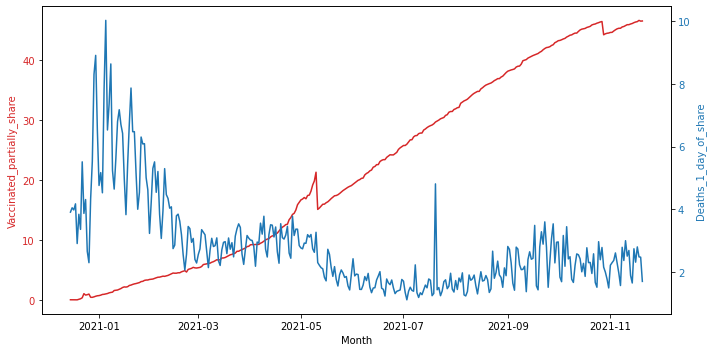

In [51]:
import numpy as np
import matplotlib.pyplot as plt

cor = join[['Year', 'Month', 'Week', 'Day', 'Vaccinated_partially_share', 'Deaths_1_day_of_share']]. \
groupby(['Year','Month', 'Day']).mean()

# Create some mock data
t = pd.to_datetime(cor.reset_index().Year.astype(str) + '/' + cor.reset_index().Month.astype(str)  + '/' + cor.reset_index().Day.astype(str))
data1 = cor.Vaccinated_partially_share
data2 = cor.Deaths_1_day_of_share

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Vaccinated_partially_share', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Deaths_1_day_of_share', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.set_size_inches(10, 5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Корреляция по неделям

In [52]:
join[['Date','Vaccinated_partially_share', 'Vaccinated_fully_share',
       'Vaccinated_partially_scaled', 'Vaccinated_fully_scaled',
       'People_partially_vaccinated_1_day_of_share', 'Deaths_1_day_of_share', 'Deaths_1_day_scaled']][join.Country_max_vaccinated_partially_share>=40] \
.groupby([join.Date.dt.year, join.Date.dt.month, join.Date.dt.week]).mean().corr()

,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled,People_partially_vaccinated_1_day_of_share,Deaths_1_day_of_share,Deaths_1_day_scaled
Vaccinated_partially_share,1.000000,0.987864,0.999081,0.985321,0.071130,-0.730881,-0.591166
Vaccinated_fully_share,0.987864,1.000000,0.987906,0.998621,-0.054349,-0.655831,-0.508928
Vaccinated_partially_scaled,0.999081,0.987906,1.000000,0.987429,0.066822,-0.720055,-0.577899
Vaccinated_fully_scaled,0.985321,0.998621,0.987429,1.000000,-0.060761,-0.645118,-0.497779
People_partially_vaccinated_1_day_of_share,0.071130,-0.054349,0.066822,-0.060761,1.000000,-0.402830,-0.414091
Deaths_1_day_of_share,-0.730881,-0.655831,-0.720055,-0.645118,-0.402830,1.000000,0.966132
Deaths_1_day_scaled,-0.591166,-0.508928,-0.577899,-0.497779,-0.414091,0.966132,1.000000


<AxesSubplot:xlabel='Year,Month,Week'>

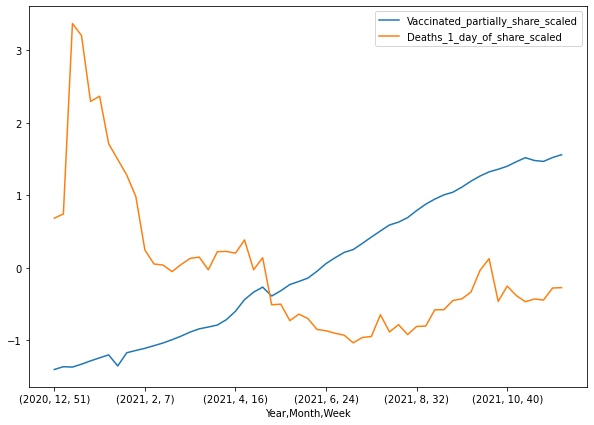

In [53]:
cor = join[['Year', 'Month', 'Week', 'Vaccinated_partially_share', 'Deaths_1_day_of_share']]. \
groupby(['Year','Month', 'Week']).mean()

for i in cor:
    cor[i + '_scaled'] = (cor[i] - cor[i].mean()) / cor[i].std()
    
cor[[i for i in cor if 'scaled' in i]].plot(figsize=(10,7))    
# cor[['Vaccinated_partially_share_scaled', 'Deaths_1_day_of_share_scaled', 'Vaccinated_partially_scaled_scaled']].plot()

# Корреляция по месяцам

In [54]:
join[['Date','Vaccinated_partially_share', 'Vaccinated_fully_share',
       'Vaccinated_partially_scaled', 'Vaccinated_fully_scaled',
       'People_partially_vaccinated_1_day_of_share', 'Deaths_1_day_of_share', 'Deaths_1_day_scaled']][join.Country_max_vaccinated_partially_share<=10]\
.groupby([join.Date.dt.year, join.Date.dt.month]).mean().corr()

,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled,People_partially_vaccinated_1_day_of_share,Deaths_1_day_of_share,Deaths_1_day_scaled
Vaccinated_partially_share,1.000000,0.983665,0.996676,0.985823,0.310822,-0.410539,-0.377561
Vaccinated_fully_share,0.983665,1.000000,0.969573,0.999259,0.409808,-0.303413,-0.236970
Vaccinated_partially_scaled,0.996676,0.969573,1.000000,0.972581,0.259504,-0.412091,-0.401269
Vaccinated_fully_scaled,0.985823,0.999259,0.972581,1.000000,0.395030,-0.307105,-0.252298
People_partially_vaccinated_1_day_of_share,0.310822,0.409808,0.259504,0.395030,1.000000,0.022637,0.235416
Deaths_1_day_of_share,-0.410539,-0.303413,-0.412091,-0.307105,0.022637,1.000000,0.925892
Deaths_1_day_scaled,-0.377561,-0.236970,-0.401269,-0.252298,0.235416,0.925892,1.000000


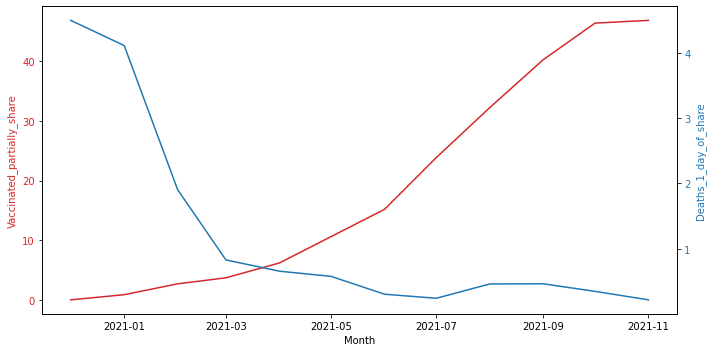

In [55]:
import numpy as np
import matplotlib.pyplot as plt

cor = join[['Year', 'Month', 'Week', 'Vaccinated_partially_share', 'Deaths_1_day_of_share']]. \
groupby(['Year','Month']).median().dropna()

# Create some mock data
t = pd.to_datetime(cor.reset_index().Year.astype(str) + '/' + cor.reset_index().Month.astype(str) + '/01')
data1 = cor.Vaccinated_partially_share
data2 = cor.Deaths_1_day_of_share

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Vaccinated_partially_share', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Deaths_1_day_of_share', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.set_size_inches(10, 5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Корреляция по странам

In [56]:
from scipy.stats import pearsonr, spearmanr

## spearmanr

In [57]:
ls_country = []

ls_all_corr = []
ls_all_p = []


ls_week_mean_corr = []
ls_week_mean_p = []

ls_week_median_corr = []
ls_week_median_p = []

ls_month_mean_corr = []
ls_month_mean_p = []

ls_month_median_corr = []
ls_month_median_p = []

ls_max_share_vaccinated = []

ls_mean_daily_share_vaccinated = []
ls_mean_daily_Deaths_1_day_of_share = []


label = 'Vaccinated_partially_scaled'
for i in join.Country.unique():
    try:


        df_temp = join[['Year','Month', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna().groupby(['Year','Month']).mean()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_month_mean_corr.append(res[0])
        ls_month_mean_p.append(res[1])
        
        
        df_temp = join[['Year','Month', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna().groupby(['Year','Month']).median()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_month_median_corr.append(res[0])
        ls_month_median_p.append(res[1])
        
        ls_country.append(i)
        
        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_all_corr.append(res[0])
        ls_all_p.append(res[1])

        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna().groupby(['Year','Month', 'Week']).mean()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_week_mean_corr.append(res[0])
        ls_week_mean_p.append(res[1])

        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna().groupby(['Year','Month', 'Week']).median()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_week_median_corr.append(res[0])
        ls_week_median_p.append(res[1])
        
        ls_max_share_vaccinated.append(join['Vaccinated_partially_share'][(join.Country==i)].max())
        ls_mean_daily_share_vaccinated.append(join.People_partially_vaccinated_1_day_of_share[(join.Country==i)].median())
        ls_mean_daily_Deaths_1_day_of_share.append(join.Deaths_1_day_of_share[(join.Country==i)].median())
        
        


    except:
        print(i, 'is not done')
        
        
        
res = dict()
res['Country'] = ls_country
res['Share_vaccinated'] = ls_max_share_vaccinated
res['Mean_daily_share_vaccinated'] = ls_mean_daily_share_vaccinated

res['Median_daily_Deaths_1_day_of_share'] = ls_mean_daily_Deaths_1_day_of_share

res['Daily_correlation'] = ls_all_corr
res['Daily_pvalue'] = ls_all_p

res['Weekly_mean_correlation'] = ls_week_mean_corr
res['Weekly_mean_pvalue'] = ls_week_mean_p

res['Weekly_median_correlation'] = ls_week_median_corr
res['Weekly_median_pvalue'] = ls_week_median_p

res['Monthly_mean_correlation'] = ls_month_mean_corr
res['Monthly_mean_pvalue'] = ls_month_mean_p

res['Monthly_median_correlation'] = ls_month_median_corr
res['Monthly_median_pvalue'] = ls_month_median_p



pd.DataFrame.from_dict(res).to_excel(f'result_correlation_spearmanr_{label}.xlsx')
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
res = pd.DataFrame.from_dict(res)
res[res.Daily_pvalue<=0.05].sort_values('Weekly_mean_correlation').reset_index(drop=True)

,Country,Share_vaccinated,Mean_daily_share_vaccinated,Median_daily_Deaths_1_day_of_share,Daily_correlation,Daily_pvalue,Weekly_mean_correlation,Weekly_mean_pvalue,Weekly_median_correlation,Weekly_median_pvalue,Monthly_mean_correlation,Monthly_mean_pvalue,Monthly_median_correlation,Monthly_median_pvalue
0,Cuba,89.265797,733.493569,0.309007,-0.703183,1.267687e-04,-1.000000,0.000000e+00,-1.000000,0.000000e+00,-1.000000,NaN,-1.000000,NaN
1,Peru,64.722931,558.764590,4.321869,-0.825921,3.741311e-72,-0.941489,2.326698e-23,-0.945548,4.652368e-24,-0.951515,2.279855e-05,-0.951515,0.000023
2,United Arab Emirates,99.101442,0.000000,0.303324,-0.771823,1.632262e-63,-0.855487,3.421063e-16,-0.834081,8.827032e-15,-0.897260,1.799264e-04,-0.872695,0.000455
3,Saudi Arabia,70.325500,928.049734,0.057448,-0.252988,2.563197e-03,-0.843662,2.237560e-07,-0.332873,1.119709e-01,-1.000000,1.404265e-24,-0.153897,0.804829
4,France,76.633723,1164.967458,1.305801,-0.780277,2.028332e-68,-0.823049,7.051438e-15,-0.805832,6.830995e-14,-0.881119,1.526741e-04,-0.825175,0.000951
5,Italy,78.845318,1700.640778,1.208986,-0.772847,1.482986e-66,-0.778469,1.642742e-12,-0.774920,2.400902e-12,-0.797203,1.900368e-03,-0.804196,0.001615
6,Germany,70.374542,1131.726404,1.147278,-0.650701,7.094668e-41,-0.748407,3.341385e-11,-0.739520,7.517174e-11,-0.825175,9.513629e-04,-0.783217,0.002586
7,Uruguay,79.915060,1153.660031,2.015127,-0.745893,1.116903e-48,-0.746392,2.607731e-09,-0.740250,4.116844e-09,-0.660606,3.758838e-02,-0.680854,0.030211
8,Canada,79.295088,1122.897849,0.131561,-0.691332,1.623515e-46,-0.732012,4.727717e-10,-0.719001,1.328756e-09,-0.718182,1.279960e-02,-0.730601,0.010659
9,Czechia,60.736005,1117.685414,2.149755,-0.697776,1.001712e-48,-0.718327,4.585306e-10,-0.719155,4.286038e-10,-0.713287,9.201780e-03,-0.707532,0.010054


## pearsonr

In [58]:
ls_country = []

ls_all_corr = []
ls_all_p = []


ls_week_mean_corr = []
ls_week_mean_p = []

ls_week_median_corr = []
ls_week_median_p = []

ls_month_mean_corr = []
ls_month_mean_p = []

ls_month_median_corr = []
ls_month_median_p = []

ls_max_share_vaccinated = []

ls_mean_daily_share_vaccinated = []
ls_mean_daily_Deaths_1_day_of_share = []

for i in join.Country.unique():
    try:


        df_temp = join[['Year','Month', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna(). \
        groupby(['Year','Month']).mean()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_month_mean_corr.append(res[0])
        ls_month_mean_p.append(res[1])
        
        
        df_temp = join[['Year','Month', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna(). \
        groupby(['Year','Month']).median()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_month_median_corr.append(res[0])
        ls_month_median_p.append(res[1])
        
        ls_country.append(i)
        
        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)]. \
        dropna()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_all_corr.append(res[0])
        ls_all_p.append(res[1])

        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)]. \
        dropna().groupby(['Year','Month', 'Week']).mean()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_week_mean_corr.append(res[0])
        ls_week_mean_p.append(res[1])

        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)]. \
        dropna().groupby(['Year','Month', 'Week']).median()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_week_median_corr.append(res[0])
        ls_week_median_p.append(res[1])
        
        ls_max_share_vaccinated.append(join['Vaccinated_partially_share'][(join.Country==i)].max())
        
        ls_mean_daily_share_vaccinated.append(join.People_partially_vaccinated_1_day_of_share[(join.Country==i)].mean())
        
        ls_mean_daily_Deaths_1_day_of_share.append(join.Deaths_1_day_of_share[(join.Country==i)].median())

    except:
        print(i, 'is not done')


res = dict()
res['Country'] = ls_country
res['Share_vaccinated'] = ls_max_share_vaccinated
res['Mean_daily_share_vaccinated'] = ls_mean_daily_share_vaccinated

res['Daily_correlation'] = ls_all_corr
res['Daily_pvalue'] = ls_all_p

res['Weekly_mean_correlation'] = ls_week_mean_corr
res['Weekly_mean_pvalue'] = ls_week_mean_p

res['Weekly_median_correlation'] = ls_week_median_corr
res['Weekly_median_pvalue'] = ls_week_median_p

res['Monthly_mean_correlation'] = ls_month_mean_corr
res['Monthly_mean_pvalue'] = ls_month_mean_p

res['Monthly_median_correlation'] = ls_month_median_corr
res['Monthly_median_pvalue'] = ls_month_median_p



pd.DataFrame.from_dict(res).to_excel(f'result_correlation_pearsonr_{label}.xlsx')
res = pd.DataFrame.from_dict(res)
res[res.Daily_pvalue<=0.05].sort_values('Weekly_mean_correlation').reset_index(drop=True)

,Country,Share_vaccinated,Mean_daily_share_vaccinated,Daily_correlation,Daily_pvalue,Weekly_mean_correlation,Weekly_mean_pvalue,Weekly_median_correlation,Weekly_median_pvalue,Monthly_mean_correlation,Monthly_mean_pvalue,Monthly_median_correlation,Monthly_median_pvalue
0,Cuba,89.265797,1068.913603,-0.740434,3.518733e-05,-0.991719,8.280516e-03,-0.994243,5.756725e-03,-1.000000,1.000000,-1.000000,1.000000
1,Italy,78.845318,2403.453264,-0.885312,8.980531e-111,-0.912757,1.192325e-22,-0.912228,1.393956e-22,-0.938904,0.000006,-0.929743,0.000012
2,Slovakia,46.982401,1441.746603,-0.834191,6.209728e-84,-0.888186,7.433098e-19,-0.884214,1.722982e-18,-0.887808,0.000264,-0.878785,0.000368
3,France,76.633723,2336.295736,-0.725722,6.830217e-55,-0.875626,1.051222e-18,-0.873860,1.502541e-18,-0.944725,0.000004,-0.937655,0.000007
4,Saudi Arabia,70.325500,5023.249992,-0.348171,2.494022e-05,-0.865212,4.863657e-08,-0.770371,1.065193e-05,-0.973976,0.005020,-0.780292,0.119467
5,Czechia,60.736005,1845.198340,-0.836412,2.376473e-86,-0.860936,1.760374e-17,-0.861589,1.564180e-17,-0.867245,0.000259,-0.863114,0.000299
6,Peru,64.722931,2290.045309,-0.754044,2.082419e-53,-0.837991,1.097735e-13,-0.828710,3.555527e-13,-0.854360,0.001645,-0.844425,0.002115
7,Belgium,76.074276,2322.183152,-0.666878,2.005926e-43,-0.801547,1.959049e-13,-0.814731,3.785297e-14,-0.783753,0.002557,-0.786248,0.002424
8,Malta,82.625242,2568.414293,-0.626085,2.201934e-34,-0.784630,5.873220e-12,-0.788299,4.006068e-12,-0.865307,0.000580,-0.892330,0.000221
9,Poland,54.271894,1658.387817,-0.605220,4.662539e-34,-0.768922,7.086632e-12,-0.737037,1.399597e-10,-0.792767,0.002101,-0.802575,0.001678


# AB testing

In [63]:
join['Deaths_1_day_of_share_orig'] = join.Deaths_1_day_of_share

## АБ тест - доли динамические (все периоды) без min max шкалирования
Например вакцинированные - это те, у кого процент вакцинации больше 40%, а невакцинированные - это те, у кого процент меньше 40% и тд в разрезах: 20, 30, 40, 50, 60 ,70, 80

In [64]:
res = dict()
margin_ls = []
margin_ls_2 = []
ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin)].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<margin)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    
    margin_ls.append(str(margin) + '-100')
    margin_ls_2.append('0-' + str(margin))
    
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [65]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = margin_ls_2


res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [66]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-100,0-20,8.376177e-03,8.529167e-01,2.412064,2.401723,-0.428724,0.514456,0.461475,-10.298467,True
1,30-100,0-30,6.391220e-31,1.245110e-18,2.082350,2.603181,25.011649,0.434265,0.530119,22.072636,False
2,40-100,0-40,3.367337e-62,3.725320e-74,1.748177,2.688599,53.794411,0.368735,0.571819,55.075998,False
3,50-100,0-50,9.612577e-111,2.073068e-103,1.545966,2.670052,72.710922,0.303324,0.587688,93.748997,False
4,60-100,0-60,1.062658e-132,1.889424e-105,1.376312,2.610740,89.691031,0.223163,0.577427,158.745964,False
5,70-100,0-70,2.703347e-126,4.011364e-81,0.990609,2.524875,154.881088,0.157873,0.546432,246.121359,False
6,80-100,0-80,8.020689e-31,5.219664e-40,0.750187,2.433877,224.436124,0.202216,0.500652,147.582209,False


## АБ тест - доли динамические для вакцинированных и статичные для невакцинированных (все периоды) без min max шкалирования
Например вакцинированные - это те, у кого процент вакцинации больше от 40% до 60%, а невакцинированные - это те, у кого процент всегда меньше 20%, т.е. доли меняются только у вакцинированных 

In [67]:
res = dict()
margin_ls = []

ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin) & ((join[label]<=margin+20))].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<20)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    margin_ls.append(str(margin) + '-' + str(margin+20))
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [68]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = '0-20'

res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [69]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-40,0-20,2.299711e-36,2.945502e-23,3.624288,2.401723,-33.732552,1.013285,0.461475,-54.457553,False
1,30-50,0-20,2.985311e-16,1.081200e-06,2.960816,2.401723,-18.883072,0.828253,0.461475,-44.283332,False
2,40-60,0-20,3.863521e-03,2.540553e-03,2.205529,2.401723,8.895566,0.591322,0.461475,-21.958733,False
3,50-70,0-20,1.769353e-14,1.337987e-26,1.818311,2.401723,32.085350,0.395249,0.461475,16.755592,False
4,60-80,0-20,1.830484e-75,2.540008e-60,1.444495,2.401723,66.267377,0.231762,0.461475,99.115670,False
5,70-90,0-20,1.400198e-94,1.864142e-71,0.971945,2.401723,147.104931,0.175877,0.461475,162.385665,False
6,80-100,0-20,1.136785e-20,1.233866e-256,0.522766,2.401723,359.426474,0.264863,0.461475,74.231595,False


# Добавляем min max шкалирование чтобы нивелировать влияние изначально низкой смертности обусловленной не вакцинацией, а длинным локдауном (как в Австралии)

In [70]:
join.Deaths_1_day_of_share = join.Deaths_1_day
join.Deaths_1_day_of_share = (join.Deaths_1_day_of_share - join.groupby('Country').Deaths_1_day_of_share.transform('min')) / \
(join.groupby('Country').Deaths_1_day_of_share.transform('max') - join.groupby('Country').Deaths_1_day_of_share.transform('min'))

## АБ тест - доли динамические (все периоды) с min-max шкалированием
Например вакцинированные - это те, у кого процент вакцинации больше 40%, а невакцинированные - это те, у кого процент меньше 40% и тд в разрезах: 20, 30, 40, 50, 60 ,70, 80

In [71]:
res = dict()
margin_ls = []
margin_ls_2 = []
ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin)].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<margin)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    
    margin_ls.append(str(margin) + '-100')
    margin_ls_2.append('0-' + str(margin))
    
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [72]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = margin_ls_2


res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [73]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-100,0-20,8.950177e-86,2.258201e-94,0.142043,0.185302,30.454637,0.050000,0.100000,100.000000,False
1,30-100,0-30,1.983530e-147,2.090692e-168,0.129264,0.187033,44.690646,0.041872,0.100000,138.820253,False
2,40-100,0-40,9.436882e-177,2.594337e-221,0.118120,0.185401,56.959560,0.034483,0.098115,184.533591,False
3,50-100,0-50,6.548322e-205,9.472553e-252,0.108326,0.182643,68.604683,0.028302,0.094697,234.595960,False
4,60-100,0-60,2.699015e-188,4.174175e-206,0.102738,0.177607,72.873119,0.023622,0.088608,275.105485,False
5,70-100,0-70,2.192773e-159,2.832265e-273,0.073082,0.172922,136.613945,0.016667,0.080000,380.000000,False
6,80-100,0-80,7.217480e-19,2.493744e-19,0.102473,0.166257,62.245439,0.023102,0.071429,209.183673,False


## АБ тест - доли динамические для вакцинированных и статичные для невакцинированных (все периоды) с min-max шкалированием
Например вакцинированные - это те, у кого процент вакцинации больше от 40% до 60%, а невакцинированные - это те, у кого процент всегда меньше 20%, т.е. доли меняются только у вакцинированных 

In [74]:
res = dict()
margin_ls = []

ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin) & ((join[label]<=margin+20))].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<20)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    margin_ls.append(str(margin) + '-' + str(margin+20))
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [75]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = '0-20'

res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [76]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-40,0-20,8.431916e-01,8.919516e-01,0.185725,0.185302,-0.227811,0.090909,0.1,10.000000,True
1,30-50,0-20,5.854314e-08,5.673089e-12,0.163555,0.185302,13.296166,0.072594,0.1,37.752521,False
2,40-60,0-20,4.282595e-30,1.962819e-58,0.137039,0.185302,35.218483,0.050633,0.1,97.500000,False
3,50-70,0-20,6.286015e-80,8.141804e-102,0.125610,0.185302,47.521476,0.037037,0.1,170.000000,False
4,60-80,0-20,1.403161e-174,3.866652e-205,0.102767,0.185302,80.312809,0.023776,0.1,320.588235,False
5,70-90,0-20,1.004770e-166,1.476474e-282,0.074589,0.185302,148.429621,0.018868,0.1,430.000000,False
6,80-100,0-20,6.616054e-17,7.701702e-21,0.111721,0.185302,65.861606,0.029703,0.1,236.666667,False


# Аналогично всё для 2021 года

In [77]:
join.Deaths_1_day_of_share = join.Deaths_1_day_of_share_orig

In [78]:
join.Deaths_1_day_of_share.describe()

count    42041.000000
mean         2.406524
std          5.703537
min          0.000000
25%          0.000000
50%          0.482735
75%          2.542721
max        497.986177
Name: Deaths_1_day_of_share, dtype: float64

In [79]:
join_copy = join.copy()

In [80]:
join = join_copy.copy()

In [81]:
print(join.shape)
join = join[join.Date.dt.year==2021]
print(join.shape)

(42041, 26)
(41872, 26)


# АБ тест - доли динамические только 2021 год
Например вакцинированные - это те, у кого процент вакцинации больше 40%, а невакцинированные - это те, у кого процент меньше 40% и тд в разрезах: 20, 30, 40, 50, 60 ,70, 80

In [82]:
res = dict()
margin_ls = []
margin_ls_2 = []
ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin)].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<margin)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    
    margin_ls.append(str(margin) + '-100')
    margin_ls_2.append('0-' + str(margin))
    
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [83]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = margin_ls_2


res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [84]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-100,0-20,5.123108e-02,4.938273e-01,2.412064,2.373865,-1.583692,0.514456,0.456089,-11.345263,True
1,30-100,0-30,3.739647e-28,3.645723e-17,2.082350,2.580534,23.924110,0.434265,0.517910,19.261252,False
2,40-100,0-40,7.499110e-59,5.206800e-71,1.748177,2.668972,52.671700,0.368735,0.562668,52.594257,False
3,50-100,0-50,4.935268e-107,5.031082e-100,1.545966,2.652015,71.544235,0.303324,0.582563,92.059255,False
4,60-100,0-60,1.648161e-129,1.406986e-102,1.376312,2.593915,88.468552,0.223163,0.566769,153.970439,False
5,70-100,0-70,2.690082e-124,1.474070e-79,0.990609,2.509291,153.307916,0.157873,0.538724,241.238897,False
6,80-100,0-80,2.215606e-30,2.130632e-39,0.750187,2.418888,222.438119,0.202216,0.492335,143.469330,False


# АБ тест - доли динамические для вакцинированных и статичные для невакцинированных только 2021 год
Например вакцинированные - это те, у кого процент вакцинации больше от 40% до 60%, а невакцинированные - это те, у кого процент всегда меньше 20%, т.е. доли меняются только у вакцинированных 

In [85]:
res = dict()
margin_ls = []

ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin) & ((join[label]<=margin+20))].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<20)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    margin_ls.append(str(margin) + '-' + str(margin+20))
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [86]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = '0-20'

res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [87]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-40,0-20,4.832528e-39,2.991375e-24,3.624288,2.373865,-34.501215,1.013285,0.456089,-54.989023,False
1,30-50,0-20,5.609877e-18,3.070030e-07,2.960816,2.373865,-19.823980,0.828253,0.456089,-44.933533,False
2,40-60,0-20,7.766181e-04,9.582772e-03,2.205529,2.373865,7.632441,0.591322,0.456089,-22.869456,False
3,50-70,0-20,6.774629e-13,2.707479e-24,1.818311,2.373865,30.553238,0.395249,0.456089,15.393080,False
4,60-80,0-20,7.498022e-72,4.988578e-57,1.444495,2.373865,64.338772,0.231762,0.456089,96.792035,False
5,70-90,0-20,1.401085e-91,7.012563e-69,0.971945,2.373865,144.238659,0.175877,0.456089,159.323684,False
6,80-100,0-20,5.339256e-20,4.241471e-251,0.522766,2.373865,354.097396,0.264863,0.456089,72.198352,False


# Добавляем min max шкалирование чтобы нивелировать влияние изначально низкой смертности обусловленной не вакцинацией, а длинным локдауном (как в Австралии)

In [88]:
join.Deaths_1_day_of_share = join.Deaths_1_day
join.Deaths_1_day_of_share = (join.Deaths_1_day_of_share - join.groupby('Country').Deaths_1_day_of_share.transform('min')) / \
(join.groupby('Country').Deaths_1_day_of_share.transform('max') - join.groupby('Country').Deaths_1_day_of_share.transform('min'))

## АБ тест - доли динамические (все периоды) только 2021 год с min-max шкалированием
Например вакцинированные - это те, у кого процент вакцинации больше 40%, а невакцинированные - это те, у кого процент меньше 40% и тд в разрезах: 20, 30, 40, 50, 60 ,70, 80

In [89]:
res = dict()
margin_ls = []
margin_ls_2 = []
ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin)].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<margin)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    
    margin_ls.append(str(margin) + '-100')
    margin_ls_2.append('0-' + str(margin))
    
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [90]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = margin_ls_2


res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [91]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-100,0-20,1.839601e-80,2.052757e-89,0.142783,0.185008,29.572737,0.050000,0.098802,97.604790,False
1,30-100,0-30,2.248540e-141,1.797561e-162,0.129983,0.186908,43.794035,0.042676,0.099099,132.213294,False
2,40-100,0-40,8.047646e-171,3.579413e-214,0.118895,0.185336,55.881996,0.034483,0.096774,180.645161,False
3,50-100,0-50,5.193086e-199,1.077751e-242,0.109245,0.182592,67.139261,0.028893,0.093473,223.518461,False
4,60-100,0-60,8.339451e-183,3.466192e-196,0.103957,0.177551,70.793845,0.024311,0.088235,262.941176,False
5,70-100,0-70,7.176196e-157,2.155835e-266,0.073785,0.173012,134.480207,0.016667,0.079661,377.966102,False
6,80-100,0-80,9.148943e-19,2.186633e-19,0.102473,0.166369,62.355170,0.023102,0.071429,209.183673,False


## АБ тест - доли динамические для вакцинированных и статичные для невакцинированных только 2021 год с min-max шкалированием
Например вакцинированные - это те, у кого процент вакцинации больше от 40% до 60%, а невакцинированные - это те, у кого процент всегда меньше 20%, т.е. доли меняются только у вакцинированных 

In [92]:
res = dict()
margin_ls = []

ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin) & ((join[label]<=margin+20))].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<20)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    margin_ls.append(str(margin) + '-' + str(margin+20))
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [93]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = '0-20'

res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [94]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-40,0-20,5.530682e-01,6.552355e-01,0.186400,0.185008,-0.747147,0.092593,0.098802,6.706587,True
1,30-50,0-20,3.876461e-07,2.640727e-11,0.163946,0.185008,12.846480,0.073611,0.098802,34.222122,False
2,40-60,0-20,1.593261e-28,3.879283e-57,0.137268,0.185008,34.778263,0.050633,0.098802,95.134731,False
3,50-70,0-20,5.432513e-76,2.043316e-96,0.126635,0.185008,46.095508,0.037736,0.098802,161.826347,False
4,60-80,0-20,8.221556e-168,7.091421e-194,0.104118,0.185008,77.690056,0.024950,0.098802,296.000000,False
5,70-90,0-20,1.102208e-162,7.216648e-274,0.075326,0.185008,145.610208,0.018868,0.098802,423.652695,False
6,80-100,0-20,1.359917e-16,1.085457e-20,0.111721,0.185008,65.598050,0.029703,0.098802,232.634731,False


# Группируем не по датам, а по целочисленному проценту вакцинированных чтобы нивелировать влияние разного количества наблюдений по разным странам, только 2021 год

In [95]:
join.Deaths_1_day_of_share = join.Deaths_1_day_of_share_orig

### Добавим целочисленный процент вакцинированных и усрдним по нему

In [96]:
join['Share_of_vaccinated_partially_round'] = join.Vaccinated_partially_share.astype(int)

In [97]:
print(join.shape)
join = join[['Country', 'Deaths_1_day', 'Vaccinated_partially_share', 'Deaths_1_day_of_share',  'Deaths_1_day_of_share_orig', 'Share_of_vaccinated_partially_round']]. \
groupby(['Country', 'Share_of_vaccinated_partially_round'],as_index=False).mean()
print(join.shape)

(41872, 27)
(5747, 6)


In [98]:
join.head()

,Country,Share_of_vaccinated_partially_round,Deaths_1_day,Vaccinated_partially_share,Deaths_1_day_of_share,Deaths_1_day_of_share_orig
0,Afghanistan,0,2.363636,0.168104,0.060718,0.060718
1,Afghanistan,1,50.544118,1.442076,1.298389,1.298389
2,Afghanistan,2,10.990196,2.388889,0.282319,0.282319
3,Afghanistan,6,2.600000,6.196670,0.066789,0.066789
4,Afghanistan,8,1.000000,8.729912,0.025688,0.025688


## АБ тест - доли динамические только 2021 год
Например вакцинированные - это те, у кого процент вакцинации больше 40%, а невакцинированные - это те, у кого процент меньше 40% и тд в разрезах: 20, 30, 40, 50, 60 ,70, 80

In [99]:
res = dict()
margin_ls = []
margin_ls_2 = []
ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin)].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<margin)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    
    margin_ls.append(str(margin) + '-100')
    margin_ls_2.append('0-' + str(margin))
    
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [100]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = margin_ls_2


res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [101]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-100,0-20,3.403578e-17,4.740960e-04,2.799050,3.444556,23.061621,0.978194,1.771171,81.065366,False
1,30-100,0-30,3.808762e-34,6.703919e-07,2.483747,3.550978,42.968592,0.828253,1.836525,121.734886,False
2,40-100,0-40,2.350989e-44,1.659112e-20,1.989676,3.595515,80.708555,0.667371,1.697341,154.332454,False
3,50-100,0-50,6.904217e-43,1.080806e-24,1.785194,3.427965,92.022004,0.585483,1.550554,164.833256,False
4,60-100,0-60,2.626169e-30,3.086396e-31,1.511957,3.289173,117.544015,0.562950,1.389685,146.857663,False
5,70-100,0-70,3.855018e-21,5.152931e-63,0.899612,3.164996,251.818053,0.451626,1.274118,182.117548,False
6,80-100,0-80,4.562252e-09,6.025836e-56,0.537185,3.066677,470.879052,0.269622,1.205945,347.272898,False


## АБ тест - доли динамические для вакцинированных и статичные для невакцинированных только 2021 год
Например вакцинированные - это те, у кого процент вакцинации больше от 40% до 60%, а невакцинированные - это те, у кого процент всегда меньше 20%, т.е. доли меняются только у вакцинированных 

In [102]:
res = dict()
margin_ls = []

ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin) & ((join[label]<=margin+20))].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<20)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    margin_ls.append(str(margin) + '-' + str(margin+20))
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [103]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = '0-20'

res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [104]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-40,0-20,3.698266e-01,2.640982e-01,3.793324,3.444556,-9.194243,1.655975,1.771171,6.956415,True
1,30-50,0-20,2.365357e-06,3.907617e-01,3.165310,3.444556,8.822069,1.226726,1.771171,44.382013,True
2,40-60,0-20,8.396255e-18,3.635356e-14,2.317578,3.444556,48.627414,0.786344,1.771171,125.241298,False
3,50-70,0-20,1.614407e-26,8.432680e-21,2.058858,3.444556,67.304232,0.617363,1.771171,186.893143,False
4,60-80,0-20,5.617199e-30,1.568432e-38,1.596777,3.444556,115.719311,0.600634,1.771171,194.883711,False
5,70-90,0-20,3.326471e-26,2.294745e-83,0.921562,3.444556,273.773529,0.499432,1.771171,254.636980,False
6,80-100,0-20,7.069894e-12,3.140169e-74,0.503702,3.444556,583.848131,0.263229,1.771171,572.862686,False


# Добавляем min max шкалирование чтобы нивелировать влияние изначально низкой смертности обусловленной не вакцинацией, а длинным локдауном (как в Австралии)

In [105]:
join.Deaths_1_day_of_share = join.Deaths_1_day
join.Deaths_1_day_of_share = (join.Deaths_1_day_of_share - join.groupby('Country').Deaths_1_day_of_share.transform('min')) / \
(join.groupby('Country').Deaths_1_day_of_share.transform('max') - join.groupby('Country').Deaths_1_day_of_share.transform('min'))

## АБ тест - доли динамические только 2021 год с min-max шкалированием
Например вакцинированные - это те, у кого процент вакцинации больше 40%, а невакцинированные - это те, у кого процент меньше 40% и тд в разрезах: 20, 30, 40, 50, 60 ,70, 80

In [106]:
res = dict()
margin_ls = []
margin_ls_2 = []
ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin)].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<margin)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    
    margin_ls.append(str(margin) + '-100')
    margin_ls_2.append('0-' + str(margin))
    
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [107]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = margin_ls_2


res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [108]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-100,0-20,5.486793e-29,7.213467e-30,0.243868,0.336171,37.849683,0.140741,0.242162,72.062790,False
1,30-100,0-30,1.344471e-44,1.158484e-44,0.223425,0.328576,47.063039,0.114363,0.237490,107.663639,False
2,40-100,0-40,8.314354e-44,1.209762e-42,0.210073,0.314165,49.550181,0.091490,0.223086,143.836044,False
3,50-100,0-50,3.478656e-37,3.415130e-38,0.197143,0.303193,53.793059,0.081040,0.210313,159.517777,False
4,60-100,0-60,4.878409e-22,4.542900e-27,0.189303,0.292612,54.573265,0.078298,0.198396,153.385541,False
5,70-100,0-70,4.742493e-14,1.572772e-21,0.158310,0.285115,80.099057,0.070099,0.189723,170.650324,False
6,80-100,0-80,2.490007e-03,4.815647e-04,0.171021,0.279230,63.271882,0.073434,0.180000,145.117647,False


## АБ тест - доли динамические для вакцинированных и статичные для невакцинированных только 2021 год с min-max шкалированием
Например вакцинированные - это те, у кого процент вакцинации больше от 40% до 60%, а невакцинированные - это те, у кого процент всегда меньше 20%, т.е. доли меняются только у вакцинированных 

In [109]:
res = dict()
margin_ls = []

ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin) & ((join[label]<=margin+20))].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<20)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    margin_ls.append(str(margin) + '-' + str(margin+20))
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [110]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = '0-20'

res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [111]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-40,0-20,1.388083e-05,1.318737e-07,0.285383,0.336171,17.796472,0.203773,0.242162,18.839131,False
1,30-50,0-20,4.212254e-16,1.230322e-18,0.249068,0.336171,34.971701,0.150000,0.242162,61.441630,False
2,40-60,0-20,3.709072e-27,5.590604e-27,0.224329,0.336171,49.856054,0.109661,0.242162,120.829087,False
3,50-70,0-20,1.980823e-32,3.776755e-33,0.209144,0.336171,60.736903,0.088889,0.242162,172.432751,False
4,60-80,0-20,1.003521e-31,9.534382e-38,0.190894,0.336171,76.103497,0.078475,0.242162,208.587294,False
5,70-90,0-20,1.591658e-23,7.767694e-32,0.159461,0.336171,110.817118,0.068407,0.242162,254.002266,False
6,80-100,0-20,5.822629e-06,6.694483e-07,0.169929,0.336171,97.830239,0.068167,0.242162,255.250388,False


In [68]:
# # Регионы
# import pandas as pd
# regions = pd.read_excel('https://rosstat.gov.ru/storage/mediabank/6F3rqSlB/Popul2021_Site.xls')
# regions = regions[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]
# regions.columns = ['Region', 'Region_population_all', 'Region_population_city', 'Region_population_country']
# regions = regions.iloc[5:,:].reset_index(drop=True)
# regions.head()